<a href="https://colab.research.google.com/github/aishwarya-hds5210/data-5160-02/blob/main/Exam1_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exam - 1, part - 1

Name - Aishwarya Mahesha

Course - High Performance Computing

Course number - HDS-5230-05

# No. of observation = 100

In [22]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from time import time
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df_100 = pd.read_csv('data_100.xlsx')
df_100

,Unnamed: 0,X1,X2,X3,X4,Y
0,1,90.364081,124.962845,9,16806.761391,1.353791e+07
1,2,112.003144,86.692744,6,8166.175559,3.910905e+06
2,3,108.002536,127.209779,9,-642.769217,1.429855e+07
3,4,149.289883,111.983918,8,12125.374518,9.322458e+06
4,5,161.963974,115.245456,8,9171.991080,1.026065e+07
...,...,...,...,...,...,...
95,96,126.010540,148.801696,8,14884.231225,2.443354e+07
96,97,122.303952,92.307151,7,12646.678902,4.854645e+06
97,98,126.199807,153.624328,8,24097.996026,2.726372e+07
98,99,124.874107,95.395287,9,9663.358994,5.420026e+06


In [24]:
# Xi as predictors and Y as the outcome
predictors = df_100[['X1', 'X2', 'X3', 'X4']]
outcome = df_100['Y']

GLM using solvers, 'lbfgs' and 'newton'

In [25]:
def fit_glm(data, solver):
    predictors = data[['X1', 'X2', 'X3', 'X4']]
    predictors = sm.add_constant(predictors)
    response = data['Y']

    # Split data into training and hold-out sets (80/20 split)
    X_train, X_test, y_train, y_test = train_test_split(predictors, response, test_size=0.2, random_state=42)

    # Time the model fitting
    start_time = time()
    model = sm.GLM(y_train, X_train, family=sm.families.Gaussian()).fit(method=solver)
    end_time = time()

    # Predict and evaluate performance
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)

    # Time taken
    time_taken = end_time - start_time

    return train_mse, test_mse, time_taken

# Fit GLM models
results = {}
results['lbfgs'] = fit_glm(df_100, 'lbfgs')
results['newton'] = fit_glm(df_100, 'newton')

results_df = pd.DataFrame(results, index=['Training', 'Hold out', 'Time (s)']).T
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'Solver'}, inplace=True)

print(results_df)


   Solver      Training      Hold out  Time (s)
0   lbfgs  9.952040e+12  4.160684e+13  0.006309
1  newton  9.952040e+12  4.160684e+13  0.004015


Here two solvers are used:

LBFGS: This solver is efficient for large datasets as it uses a limited amount of memory to approximate the full Hessian matrix, making it scalable and fast for bigger models or datasets.

Newton: Known for fast convergence using the full Hessian matrix, this method is preferred for smaller datasets where higher computational cost is manageable and fast convergence with fewer iterations is desirable.

Testing both solvers helps determine the best fit based on the balance of accuracy and computational efficiency for a given scenario.

Text(0.5, 1.0, 'Model Building Time for Data Size = 100')

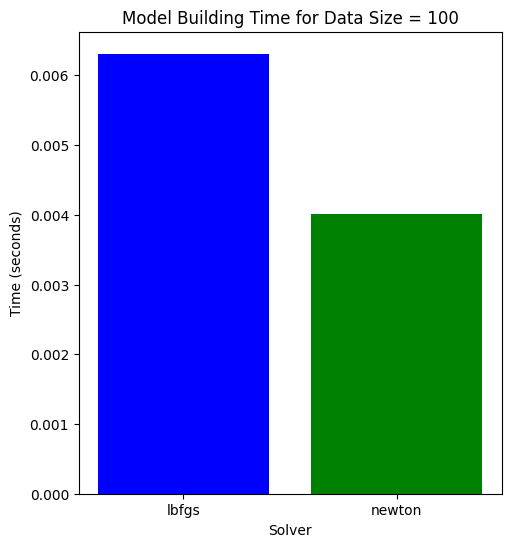

In [26]:
# plotting Model Building Time for Data Size = 100
data_sizes = [100]
time_taken = [results['lbfgs'][2], results['newton'][2]]
test_mse = [results['lbfgs'][1], results['newton'][1]]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(['lbfgs', 'newton'], time_taken, color=['blue', 'green'])
plt.xlabel('Solver')
plt.ylabel('Time (seconds)')
plt.title('Model Building Time for Data Size = 100')

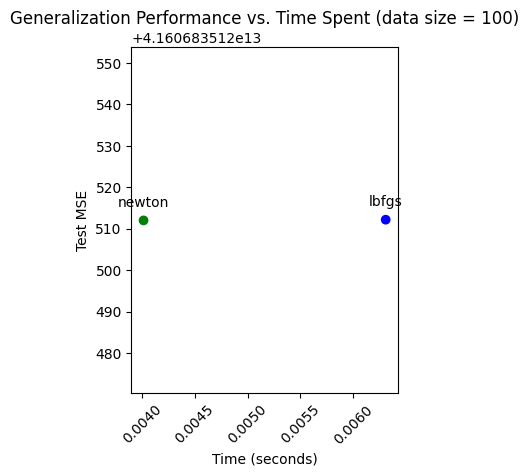

In [27]:
# Plotting: Generalization Performance vs. Time Spent
plt.subplot(1, 2, 2)
plt.scatter(time_taken, test_mse, color=['blue', 'green'])
for i, txt in enumerate(['lbfgs', 'newton']):
    plt.annotate(txt, (time_taken[i], test_mse[i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.xlabel('Time (seconds)')
plt.ylabel('Test MSE')
plt.title('Generalization Performance vs. Time Spent (data size = 100)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

DL Network

In [28]:
def fit_dl1(data):
    predictors = data[['X1', 'X2', 'X3', 'X4']].values
    outcome = data['Y'].values
    X_train, X_test, y_train, y_test = train_test_split(predictors, outcome, test_size=0.2, random_state=42)

    start_time = time()

    model = Sequential([
        Dense(10, input_dim=4, activation='relu'),  # Single hidden layer with 10 neurons
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')

    # Fit the model
    model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)

    # Predict and evaluate
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    end_time = time()
    elapsed_time = end_time - start_time

    return model, train_mse, test_mse, elapsed_time

# Fit DL model
dl_model_config1_100, train_mse, test_mse, elapsed_time = fit_dl1(df_100)

print("Training set: {:.3f}".format(train_mse))
print("hold out set: {:.3f}".format(test_mse))
print("Time taken: {:.2f} seconds".format(elapsed_time))

1/1 [==============================] - 0s 44ms/step
Training set: 243922588166292.812
hold out set: 505070602640556.812
Time taken: 4.85 seconds


For Configuration 2 -

Increased Neurons: The hidden layer now has 20 neurons instead of 10. This change can potentially increase the model's capacity to learn more complex patterns from the data but may also increase the risk of overfitting.

Adjusted Epochs and Batch Size: The model is trained for 100 epochs with a batch size of 20. These adjustments can influence both the training time and the convergence characteristics of the model.

In [29]:
def fit_dl2(data):
    predictors = data[['X1', 'X2', 'X3', 'X4']].values
    outcome = data['Y'].values
    X_train, X_test, y_train, y_test = train_test_split(predictors, outcome, test_size=0.2, random_state=42)

    start_time = time()

    model = Sequential([
        Dense(20, input_dim=4, activation='relu'),  # Single hidden layer with 20 neurons
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')

    # Fit the model
    model.fit(X_train, y_train, epochs=100, batch_size=20, verbose=0)

    # Predict and evaluate
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    end_time = time()
    elapsed_time = end_time - start_time

    return model, train_mse, test_mse, elapsed_time

# Fit DL model
dl_model_config2_100, train_mse_config2, test_mse_config2, elapsed_time_config2 = fit_dl2(df_100)

print("Training set: {:.3f}".format(train_mse_config2))
print("Hold out set: {:.3f}".format(test_mse_config2))
print("Time taken: {:.2f} seconds".format(elapsed_time_config2))

1/1 [==============================] - 0s 21ms/step
Training set: 243664082706408.500
Hold out set: 504730305358930.375
Time taken: 4.03 seconds


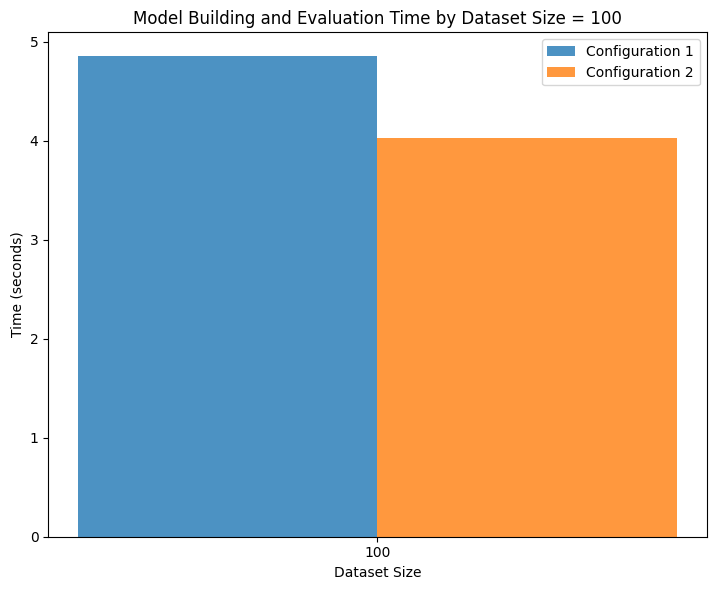

In [30]:
dataset_sizes = [100]
times_config1 = [elapsed_time]  # Time from configuration 1
times_config2 = [elapsed_time_config2]  # Time from configuration 2
test_mses_config1 = [test_mse]  # Test MSE from configuration 1
test_mses_config2 = [test_mse_config2]  # Test MSE from configuration 2

bar_width = 0.35
index = np.arange(len(dataset_sizes))

plt.figure(figsize=(14, 6))

# Plotting Time vs. Dataset Size
plt.subplot(1, 2, 1)
bar1 = plt.bar(index, times_config1, bar_width, label='Configuration 1', alpha=0.8)
bar2 = plt.bar(index + bar_width, times_config2, bar_width, label='Configuration 2', alpha=0.8)

plt.xlabel('Dataset Size')
plt.ylabel('Time (seconds)')
plt.title('Model Building and Evaluation Time by Dataset Size = 100')
plt.xticks(index + bar_width / 2, dataset_sizes)
plt.legend()

plt.tight_layout()
plt.show()

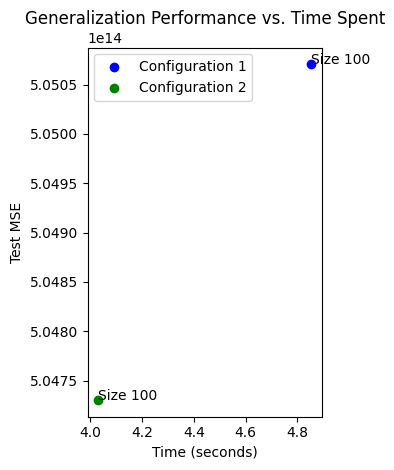

In [31]:
# Test MSE vs. Time

times_config1 = [elapsed_time]  # Time from configuration 1
times_config2 = [elapsed_time_config2]  # Time from configuration 2
test_mses_config1 = [test_mse]  # Test MSE from configuration 1
test_mses_config2 = [test_mse_config2]  # Test MSE from configuration 2

plt.subplot(1, 2, 2)
plt.scatter(times_config1, test_mses_config1, color='blue', label='Configuration 1')
plt.scatter(times_config2, test_mses_config2, color='green', label='Configuration 2')
for i, txt in enumerate(dataset_sizes):
    plt.annotate(f'Size {txt}', (times_config1[i], test_mses_config1[i]))
    plt.annotate(f'Size {txt}', (times_config2[i], test_mses_config2[i]))
plt.xlabel('Time (seconds)')
plt.ylabel('Test MSE')
plt.title('Generalization Performance vs. Time Spent')
plt.legend()

plt.tight_layout()
plt.show()

# No. of observation = 1000

In [32]:
df_1000 = pd.read_csv('data_1000.xlsx')
df_1000

,Unnamed: 0,X1,X2,X3,X4,Y
0,1,90.364081,90.567298,78,-1919.295810,4.443668e+06
1,2,112.003144,121.463744,84,-842.181042,1.219263e+07
2,3,108.002536,148.489814,82,13041.298710,2.463865e+07
3,4,149.289883,90.182749,83,12695.555016,4.875082e+06
4,5,161.963974,112.800853,77,9170.871347,9.795227e+06
...,...,...,...,...,...,...
995,996,178.943938,142.396052,79,-48.815466,2.098328e+07
996,997,129.080852,154.819882,83,22727.490552,2.866530e+07
997,998,127.432891,143.677177,80,3523.929462,2.174982e+07
998,999,129.935998,90.584827,78,21079.025522,5.187290e+06


In [33]:
# Xi as predictors and Y as the outcome
predictors = df_1000[['X1', 'X2', 'X3', 'X4']]
outcome = df_1000['Y']

In [34]:
def fit_glm(data, solver):
    predictors = data[['X1', 'X2', 'X3', 'X4']]
    predictors = sm.add_constant(predictors)
    response = data['Y']

    # Split data into training and hold-out sets (80/20 split)
    X_train, X_test, y_train, y_test = train_test_split(predictors, response, test_size=0.2, random_state=42)

    # Time the model fitting
    start_time = time()
    model = sm.GLM(y_train, X_train, family=sm.families.Gaussian()).fit(method=solver)
    end_time = time()

    # Predict and evaluate performance
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)

    # Time taken
    time_taken = end_time - start_time

    return train_mse, test_mse, time_taken

# Fit GLM models
results = {}
results['lbfgs'] = fit_glm(df_1000, 'lbfgs')
results['newton'] = fit_glm(df_1000, 'newton')

results_df = pd.DataFrame(results, index=['Training', 'Hold out', 'Time (s)']).T
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'Solver'}, inplace=True)

print(results_df)

   Solver      Training      Hold out  Time (s)
0   lbfgs  9.206496e+12  6.075225e+12  0.003979
1  newton  9.206496e+12  6.075225e+12  0.009584


Text(0.5, 1.0, 'Model Building Time for Data Size = 1000')

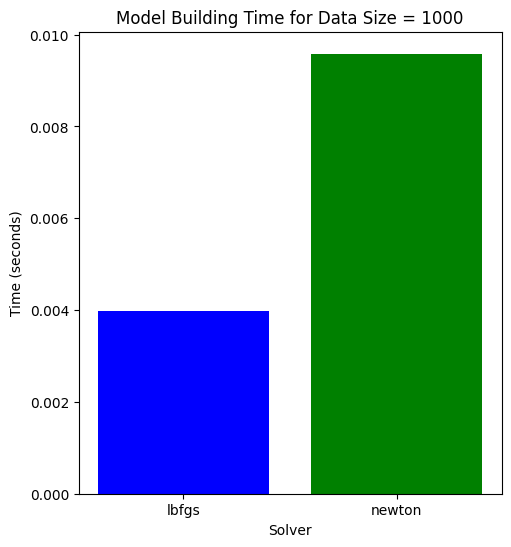

In [35]:
# plotting Model Building Time for Data Size = 1000
data_sizes = [1000]
time_taken = [results['lbfgs'][2], results['newton'][2]]
test_mse = [results['lbfgs'][1], results['newton'][1]]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(['lbfgs', 'newton'], time_taken, color=['blue', 'green'])
plt.xlabel('Solver')
plt.ylabel('Time (seconds)')
plt.title('Model Building Time for Data Size = 1000')

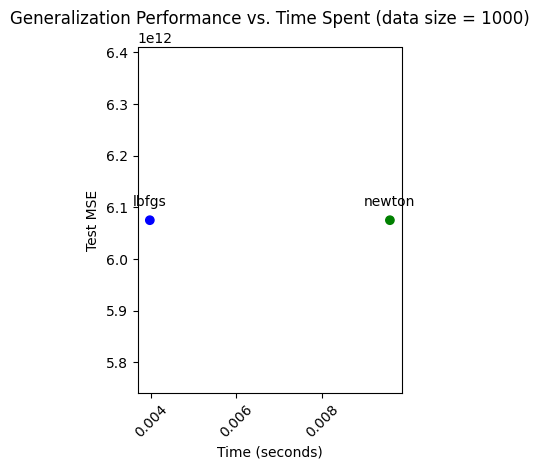

In [36]:
# Plotting: Generalization Performance vs. Time Spent
plt.subplot(1, 2, 2)
plt.scatter(time_taken, test_mse, color=['blue', 'green'])
for i, txt in enumerate(['lbfgs', 'newton']):
    plt.annotate(txt, (time_taken[i], test_mse[i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.xlabel('Time (seconds)')
plt.ylabel('Test MSE')
plt.title('Generalization Performance vs. Time Spent (data size = 1000)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

DL Network

In [37]:
def fit_dl1(data):
    predictors = data[['X1', 'X2', 'X3', 'X4']].values
    outcome = data['Y'].values
    X_train, X_test, y_train, y_test = train_test_split(predictors, outcome, test_size=0.2, random_state=42)

    start_time = time()

    model = Sequential([
        Dense(10, input_dim=4, activation='relu'),  # Single hidden layer with 10 neurons
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')

    # Fit the model
    model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)

    # Predict and evaluate
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    end_time = time()
    elapsed_time = end_time - start_time

    return model, train_mse, test_mse, elapsed_time

# Fit DL model
dl_model_config1_1000, train_mse, test_mse, elapsed_time = fit_dl1(df_1000)

print("Training set: {:.3f}".format(train_mse))
print("hold out set: {:.3f}".format(test_mse))
print("Time taken: {:.2f} seconds".format(elapsed_time))

7/7 [==============================] - 0s 2ms/step
Training set: 196541333916220.750
hold out set: 149621261263902.594
Time taken: 7.29 seconds


In [38]:
def fit_dl2(data):
    predictors = data[['X1', 'X2', 'X3', 'X4']].values
    outcome = data['Y'].values
    X_train, X_test, y_train, y_test = train_test_split(predictors, outcome, test_size=0.2, random_state=42)

    start_time = time()

    model = Sequential([
        Dense(20, input_dim=4, activation='relu'),  # Single hidden layer with 20 neurons
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')

    # Fit the model
    model.fit(X_train, y_train, epochs=100, batch_size=20, verbose=0)

    # Predict and evaluate
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    end_time = time()
    elapsed_time = end_time - start_time

    return model, train_mse, test_mse, elapsed_time

# Fit DL model
dl_model_config2_1000, train_mse_config2, test_mse_config2, elapsed_time_config2 = fit_dl2(df_1000)

print("Training set: {:.3f}".format(train_mse_config2))
print("Hold out set: {:.3f}".format(test_mse_config2))
print("Time taken: {:.2f} seconds".format(elapsed_time_config2))

7/7 [==============================] - 0s 2ms/step
Training set: 180825946424885.312
Hold out set: 135138872909164.875
Time taken: 11.49 seconds


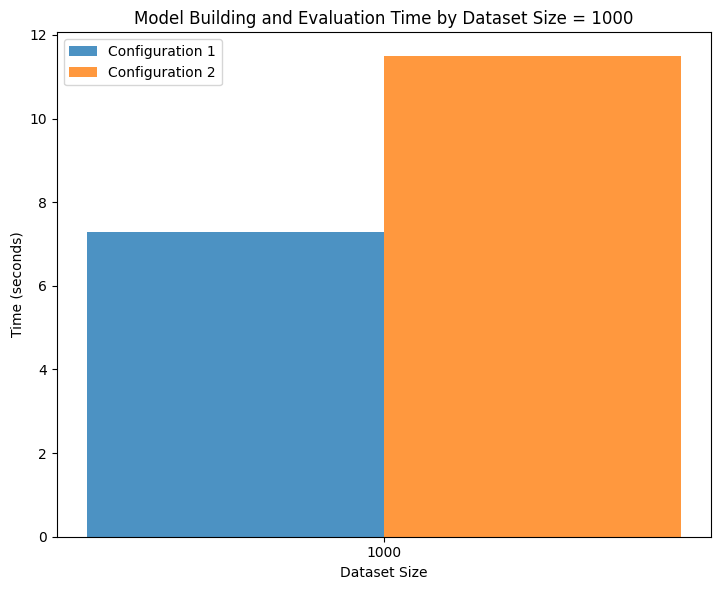

In [39]:
dataset_sizes = [1000]
times_config1 = [elapsed_time]  # Time from configuration 1
times_config2 = [elapsed_time_config2]  # Time from configuration 2
test_mses_config1 = [test_mse]  # Test MSE from configuration 1
test_mses_config2 = [test_mse_config2]  # Test MSE from configuration 2

bar_width = 0.35
index = np.arange(len(dataset_sizes))

plt.figure(figsize=(14, 6))

# Plotting Time vs. Dataset Size
plt.subplot(1, 2, 1)
bar1 = plt.bar(index, times_config1, bar_width, label='Configuration 1', alpha=0.8)
bar2 = plt.bar(index + bar_width, times_config2, bar_width, label='Configuration 2', alpha=0.8)

plt.xlabel('Dataset Size')
plt.ylabel('Time (seconds)')
plt.title('Model Building and Evaluation Time by Dataset Size = 1000')
plt.xticks(index + bar_width / 2, dataset_sizes)
plt.legend()

plt.tight_layout()
plt.show()

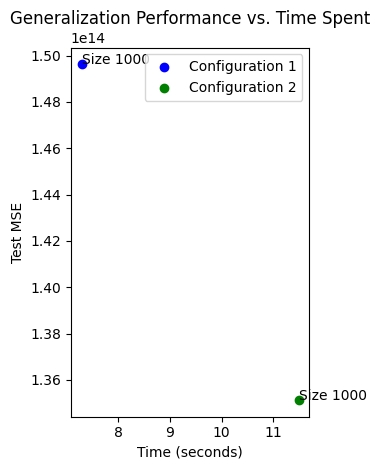

In [40]:
# Test MSE vs. Time

times_config1 = [elapsed_time]  # Time from configuration 1
times_config2 = [elapsed_time_config2]  # Time from configuration 2
test_mses_config1 = [test_mse]  # Test MSE from configuration 1
test_mses_config2 = [test_mse_config2]  # Test MSE from configuration 2

plt.subplot(1, 2, 2)
plt.scatter(times_config1, test_mses_config1, color='blue', label='Configuration 1')
plt.scatter(times_config2, test_mses_config2, color='green', label='Configuration 2')
for i, txt in enumerate(dataset_sizes):
    plt.annotate(f'Size {txt}', (times_config1[i], test_mses_config1[i]))
    plt.annotate(f'Size {txt}', (times_config2[i], test_mses_config2[i]))
plt.xlabel('Time (seconds)')
plt.ylabel('Test MSE')
plt.title('Generalization Performance vs. Time Spent')
plt.legend()

plt.tight_layout()
plt.show()

# No. of observation = 100000

In [41]:
df_100000 = pd.read_csv('data_100000.xlsx')
df_100000

,Unnamed: 0,X1,X2,X3,X4,Y
0,1,90.364081,132.773374,8012,3330.901571,2.722814e+07
1,2,112.003144,103.106449,8043,11009.506293,4.244043e+07
2,3,108.002536,84.151617,8049,12494.718477,4.375816e+07
3,4,149.289883,162.299784,8026,9416.188493,6.298776e+07
4,5,161.963974,116.313189,8007,5649.598978,2.865589e+07
...,...,...,...,...,...,...
99995,99996,114.071182,84.171427,7966,19884.933189,6.690158e+07
99996,99997,114.981990,117.905424,8045,28433.600321,1.025824e+08
99997,99998,63.300644,96.256345,7969,11243.317723,4.140059e+07
99998,99999,108.124254,80.373015,7941,209.304810,3.675090e+06


In [42]:
# Xi as predictors and Y as the outcome
predictors = df_100000[['X1', 'X2', 'X3', 'X4']]
outcome = df_100000['Y']

In [43]:
def fit_glm(data, solver):
    predictors = data[['X1', 'X2', 'X3', 'X4']]
    predictors = sm.add_constant(predictors)
    response = data['Y']

    # Split data into training and hold-out sets (80/20 split)
    X_train, X_test, y_train, y_test = train_test_split(predictors, response, test_size=0.2, random_state=42)

    # Time the model fitting
    start_time = time()
    model = sm.GLM(y_train, X_train, family=sm.families.Gaussian()).fit(method=solver)
    end_time = time()

    # Predict and evaluate performance
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)

    # Time taken
    time_taken = end_time - start_time

    return train_mse, test_mse, time_taken

# Fit GLM models
results = {}
results['lbfgs'] = fit_glm(df_100000, 'lbfgs')
results['newton'] = fit_glm(df_100000, 'newton')

results_df = pd.DataFrame(results, index=['Training', 'Hold out', 'Time (s)']).T
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'Solver'}, inplace=True)

print(results_df)

   Solver      Training      Hold out  Time (s)
0   lbfgs  8.906079e+12  8.787843e+12  0.118389
1  newton  8.906079e+12  8.787843e+12  0.171476


Text(0.5, 1.0, 'Model Building Time for Data Size = 100000')

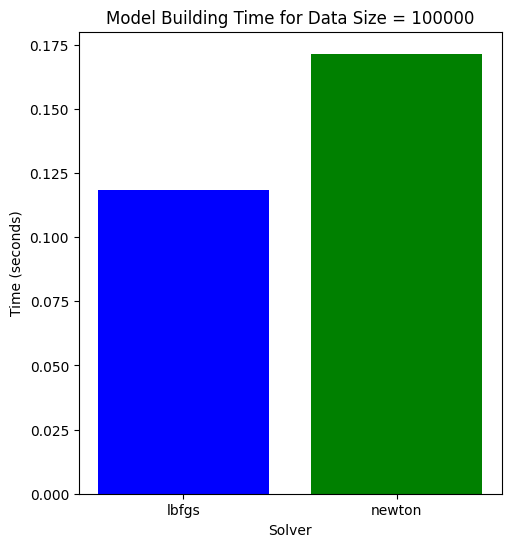

In [44]:
# plotting Model Building Time for Data Size = 100000
data_sizes = [100000]
time_taken = [results['lbfgs'][2], results['newton'][2]]
test_mse = [results['lbfgs'][1], results['newton'][1]]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(['lbfgs', 'newton'], time_taken, color=['blue', 'green'])
plt.xlabel('Solver')
plt.ylabel('Time (seconds)')
plt.title('Model Building Time for Data Size = 100000')

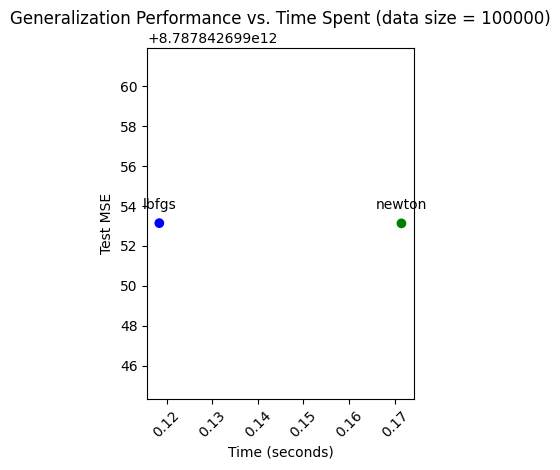

In [45]:
# Plotting: Generalization Performance vs. Time Spent
plt.subplot(1, 2, 2)
plt.scatter(time_taken, test_mse, color=['blue', 'green'])
for i, txt in enumerate(['lbfgs', 'newton']):
    plt.annotate(txt, (time_taken[i], test_mse[i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.xlabel('Time (seconds)')
plt.ylabel('Test MSE')
plt.title('Generalization Performance vs. Time Spent (data size = 100000)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [47]:
def fit_dl1(data):
    predictors = data[['X1', 'X2', 'X3', 'X4']].values
    outcome = data['Y'].values
    X_train, X_test, y_train, y_test = train_test_split(predictors, outcome, test_size=0.2, random_state=42)

    start_time = time()

    model = Sequential([
        Dense(10, input_dim=4, activation='relu'),  # Single hidden layer with 10 neurons
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')

    # Fit the model
    model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)

    # Predict and evaluate
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    end_time = time()
    elapsed_time = end_time - start_time

    return model, train_mse, test_mse, elapsed_time

# Fit DL model
dl_model_config1_100000, train_mse, test_mse, elapsed_time = fit_dl1(df_100000)

print("Training set: {:.3f}".format(train_mse))
print("hold out set: {:.3f}".format(test_mse))
print("Time taken: {:.2f} seconds".format(elapsed_time))

625/625 [==============================] - 1s 1ms/step
Training set: 71500793095040.047
hold out set: 71011316896218.344
Time taken: 550.70 seconds


In [48]:
def fit_dl2(data):
    predictors = data[['X1', 'X2', 'X3', 'X4']].values
    outcome = data['Y'].values
    X_train, X_test, y_train, y_test = train_test_split(predictors, outcome, test_size=0.2, random_state=42)

    start_time = time()

    model = Sequential([
        Dense(20, input_dim=4, activation='relu'),  # Single hidden layer with 20 neurons
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')

    # Fit the model
    model.fit(X_train, y_train, epochs=100, batch_size=20, verbose=0)

    # Predict and evaluate
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    end_time = time()
    elapsed_time = end_time - start_time

    return model, train_mse, test_mse, elapsed_time

# Fit DL model
dl_model_config2_100000, train_mse_config2, test_mse_config2, elapsed_time_config2 = fit_dl2(df_100000)

print("Training set: {:.3f}".format(train_mse_config2))
print("Hold out set: {:.3f}".format(test_mse_config2))
print("Time taken: {:.2f} seconds".format(elapsed_time_config2))

625/625 [==============================] - 1s 1ms/step
Training set: 53503655623940.195
Hold out set: 53124087483798.359
Time taken: 558.85 seconds


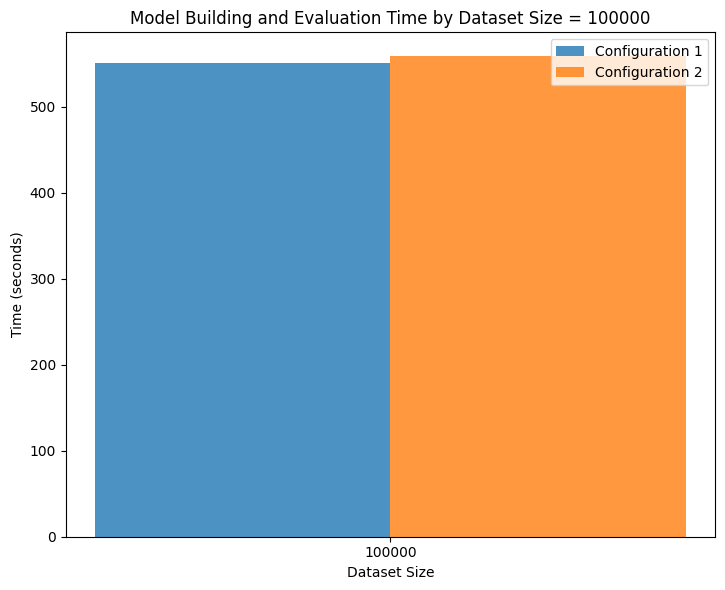

In [49]:
dataset_sizes = [100000]
times_config1 = [elapsed_time]  # Time from configuration 1
times_config2 = [elapsed_time_config2]  # Time from configuration 2
test_mses_config1 = [test_mse]  # Test MSE from configuration 1
test_mses_config2 = [test_mse_config2]  # Test MSE from configuration 2

bar_width = 0.35
index = np.arange(len(dataset_sizes))

plt.figure(figsize=(14, 6))

# Plotting Time vs. Dataset Size
plt.subplot(1, 2, 1)
bar1 = plt.bar(index, times_config1, bar_width, label='Configuration 1', alpha=0.8)
bar2 = plt.bar(index + bar_width, times_config2, bar_width, label='Configuration 2', alpha=0.8)

plt.xlabel('Dataset Size')
plt.ylabel('Time (seconds)')
plt.title('Model Building and Evaluation Time by Dataset Size = 100000')
plt.xticks(index + bar_width / 2, dataset_sizes)
plt.legend()

plt.tight_layout()
plt.show()

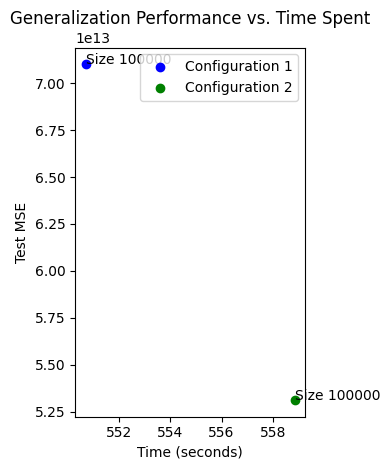

In [50]:
# Test MSE vs. Time

times_config1 = [elapsed_time]  # Time from configuration 1
times_config2 = [elapsed_time_config2]  # Time from configuration 2
test_mses_config1 = [test_mse]  # Test MSE from configuration 1
test_mses_config2 = [test_mse_config2]  # Test MSE from configuration 2

plt.subplot(1, 2, 2)
plt.scatter(times_config1, test_mses_config1, color='blue', label='Configuration 1')
plt.scatter(times_config2, test_mses_config2, color='green', label='Configuration 2')
for i, txt in enumerate(dataset_sizes):
    plt.annotate(f'Size {txt}', (times_config1[i], test_mses_config1[i]))
    plt.annotate(f'Size {txt}', (times_config2[i], test_mses_config2[i]))
plt.xlabel('Time (seconds)')
plt.ylabel('Test MSE')
plt.title('Generalization Performance vs. Time Spent')
plt.legend()

plt.tight_layout()
plt.show()

Overall,

Variation in Model Building Time and Predictive Performance Across Dataset Sizes:

- The time taken to build and evaluate models increases with dataset size across all methods. Notably, Deep Learning models show a significant increase in time as the dataset size grows, with times rising from 1.42 seconds for 100 observations to over 11.49 seconds for 1,000 observations and up to 550.70 seconds for 100,000 observations. GLM and XGBoost, however, maintain relatively lower and more consistent times across sizes.

- Predictive Performance: The generalization performance for GLM and XGBoost seems to improve or maintain a reasonable error as the dataset size increases. Deep Learning, however, shows extraordinarily high error rates, suggesting possible overfitting or inadequacy of the model configuration for the type of data or task.

Generalization Predictive Performance Based on Time Spent:

- Efficiency vs. Effectiveness: For smaller datasets, XGBoost provides a good balance between time efficiency and predictive performance, especially noticeable in the 100 and 1,000 observations set. Deep Learning, despite taking longer, does not necessarily translate this into substantially better generalization, especially given its high error rates.